# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
pd.DataFrame(X)

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [5]:
pd.DataFrame(y)

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance.
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

In [9]:
pd.DataFrame(X)

,0
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078
5,0.174078
6,0.522233
7,0.870388
8,1.218544
9,1.566699


In [10]:
pd.DataFrame(y)

,0
0,-0.720043
1,-0.702438
2,-0.667228
3,-0.596808
4,-0.491178
5,-0.350339
6,-0.174289
7,0.177810
8,0.882008
9,2.642503


## Training the SVR model on the whole dataset

In [12]:
from sklearn.svm import SVR

# Epsilon-Support Vector Regression.
regressor = SVR(kernel='rbf')
regressor.fit(X, np.ravel(y))

SVR()

## Predicting a new result

In [13]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[252789.13921624]])

## Visualising the SVR results

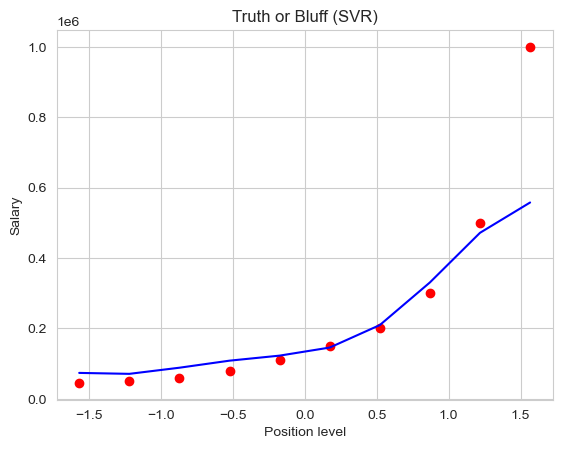

In [21]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

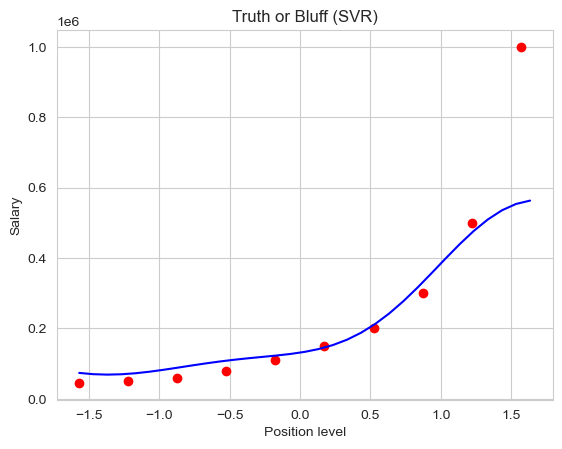

In [22]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)) + 0.1, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()